In [1]:
                                                       #**ASSIGNMENT1**

#task1
# Write Python code to load the raw train_FD001.txt dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
# Expected Output: DataFrame shape, info, and sample rows.
#CODE:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ["engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"] + [f"sensor_{i}" for i in range(1,22)]

df = pd.read_csv('train_FD001.txt', sep=r'\s+', header=None, names=column_names)

print("Shape of the DataFrame:", df.shape)
print("First 5 rows of dataset:")
print(df.head())

print("\n--- Data Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe().transpose())

print("\nMissing values per column:")
print(df.isnull().sum())

if df.isnull().any().any():
    df = df.fillna(method='ffill').fillna(method='bfill')
    print("Missing values after filling:", df.isnull().sum().sum())
else:
    print("No missing values detected.")

df.to_csv('cmapss_cleaned_train_FD001.csv', index=False)

print(f"\nThe cleaned dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data loading and initial cleaning complete.")


Shape of the DataFrame: (20631, 26)
First 5 rows of dataset:
   engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0          1      1       -0.0007       -0.0004         100.0    518.67   
1          1      2        0.0019       -0.0003         100.0    518.67   
2          1      3       -0.0043        0.0003         100.0    518.67   
3          1      4        0.0007        0.0000         100.0    518.67   
4          1      5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_1

Shape of dataset: (20631, 26)
First 5 rows:
    engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0          1      1       -0.0007       -0.0004         100.0    518.67   
1          1      2        0.0019       -0.0003         100.0    518.67   
2          1      3       -0.0043        0.0003         100.0    518.67   
3          1      4        0.0007        0.0000         100.0    518.67   
4          1      5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \


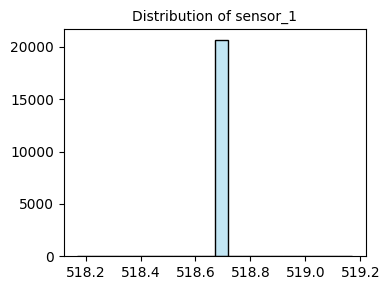

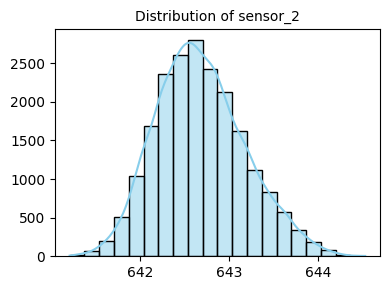

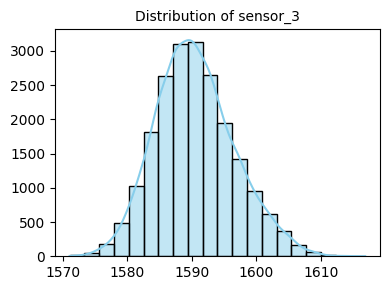

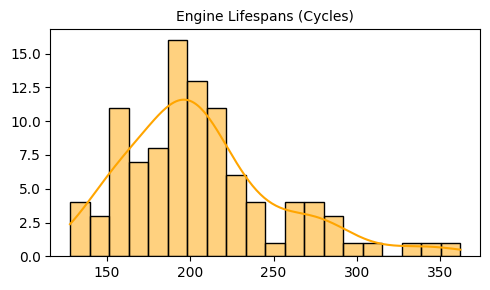

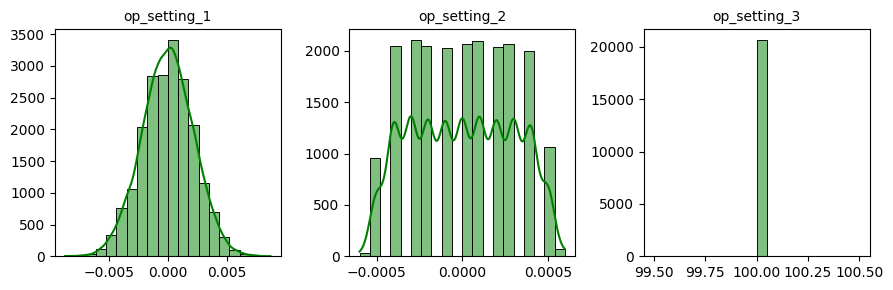

In [10]:
# task2
# Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
# Expected Output: Three histogram plots and a summary/report on missing values per column.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cmapss_cleaned_train_FD001.csv')

print("Shape of dataset:", df.shape)
print("First 5 rows:\n", df.head())

print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values detected in the dataset.")
else:
    print("\nThere are missing values, consider filling or removing them.")

sensor_list = ['sensor_1', 'sensor_2', 'sensor_3']
for sensor in sensor_list:
    plt.figure(figsize=(4,3))
    sns.histplot(df[sensor], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {sensor}", fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

cycle_counts = df.groupby('engine_id')['cycle'].max()
plt.figure(figsize=(5,3))
sns.histplot(cycle_counts, bins=20, kde=True, color='orange')
plt.title("Engine Lifespans (Cycles)", fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

op_settings = ['op_setting_1', 'op_setting_2', 'op_setting_3']
fig, axs = plt.subplots(1, 3, figsize=(9,3))
for idx, col in enumerate(op_settings):
    sns.histplot(df[col], bins=20, kde=True, ax=axs[idx], color='green')
    axs[idx].set_title(col, fontsize=10)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
plt.tight_layout()


In [11]:
#task3
# For a selected sensor (e.g., sensor_2), compute and append to the DataFrame:
                       # The mean and standard deviation of sensor_2 by each engine_id
                       # The rolling mean (window size=5) for each engine’s sensor_2 readings
# Expected Output: Show a few sample rows with these new features
import pandas as pd

df = pd.read_csv('cmapss_cleaned_train_FD001.csv')

sensor_agg = df.groupby('engine_id')['sensor_2'].agg(['mean', 'std']).reset_index()
sensor_agg.rename(columns={'mean':'sensor_2_mean_by_engine', 'std':'sensor_2_std_by_engine'}, inplace=True)

df = df.merge(sensor_agg, on='engine_id', how='left')

df['sensor_2_rollmean5'] = df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

cols_to_show = ['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine', 'sensor_2_rollmean5']
print(df[cols_to_show].head(10))



   engine_id  cycle  sensor_2  sensor_2_mean_by_engine  \
0          1      1    641.82               642.621042   
1          1      2    642.15               642.621042   
2          1      3    642.35               642.621042   
3          1      4    642.35               642.621042   
4          1      5    642.37               642.621042   
5          1      6    642.10               642.621042   
6          1      7    642.48               642.621042   
7          1      8    642.56               642.621042   
8          1      9    642.12               642.621042   
9          1     10    641.71               642.621042   

   sensor_2_std_by_engine  sensor_2_rollmean5  
0                0.486795          641.820000  
1                0.486795          641.985000  
2                0.486795          642.106667  
3                0.486795          642.167500  
4                0.486795          642.208000  
5                0.486795          642.264000  
6                0.486795

In [12]:
#task4:
# Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, # maintaining the original engine_id and cycle columns.
# Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cmapss_cleaned_train_FD001.csv')

sensor_cols = [col for col in df.columns if 'sensor_' in col]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])

print("Head of normalized sensor columns:")
print(df_scaled[['engine_id', 'cycle'] + sensor_cols].head())

print("\nMean of normalized columns (should be ~0):")
print(df_scaled[sensor_cols].mean().round(6))

print("\nStd of normalized columns (should be ~1):")
print(df_scaled[sensor_cols].std().round(6))


Head of normalized sensor columns:
   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_12  sensor_13  sensor_14  \
0  0.141683  1.121141 -0.516338  ...   0.334262  -1.058890  -0.269071   
1  0.141683  0.431930 -0.798093  ...   1.174899  -0.363646  -0.642845   
2  0.141683  1.008155 -0.234584  ...   1.364721  -0.919841  -0.551629   
3  0.141683  1.222827  0.188048  ...   1.961302  -0.224597  -0.520176   
4  0.141683  0.714393 -0.516338  ...   1.052871  -0.780793  -0.521748   

   sensor_15     sensor_16  sensor_17  sensor_18  sensor_19  se

In [2]:
#task5
# Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
# Expected Output: Array shape, example content, and confirmation of successful file saves.

import pandas as pd
import numpy as np

df = pd.read_csv('cmapss_cleaned_train_FD001.csv')
print("Cleaned dataset shape:", df.shape)

window_stats = 5
sensor_cols = [col for col in df.columns if 'sensor' in col]

for col in sensor_cols:
    df[f'{col}_rollmean{window_stats}'] = df.groupby('engine_id')[col].rolling(window_stats).mean().reset_index(0, drop=True)
    df[f'{col}_rollstd{window_stats}'] = df.groupby('engine_id')[col].rolling(window_stats).std().reset_index(0, drop=True)

exclude_cols = ['engine_id', 'cycle']
feature_cols = [col for col in df.columns if col not in exclude_cols]

df = df.sort_values(['engine_id', 'cycle']).reset_index(drop=True)

def generate_rolling_windows(data, engine_col, features, window_size=30):
    sequences, engine_ids, cycle_ids = [], [], []
    for engine in data[engine_col].unique():
        engine_data = data[data[engine_col] == engine]
        engine_features = engine_data[features].values
        for i in range(window_size - 1, len(engine_data)):
            seq = engine_features[i - window_size + 1: i + 1]
            sequences.append(seq)
            engine_ids.append(engine)
            cycle_ids.append(engine_data.iloc[i]['cycle'])
    sequences = np.array(sequences)
    return sequences, engine_ids, cycle_ids

window_size = 30
sequences, engine_ids, cycle_ids = generate_rolling_windows(df, 'engine_id', feature_cols, window_size)

print("Shape of rolling window sequences:", sequences.shape)
print("Example sequence shape:", sequences[0].shape)
print(f"Engine ID: {engine_ids[0]}, Cycle: {cycle_ids[0]}")
print("Sequence data for first time window (shape {}):".format(sequences[0].shape))
print(sequences[0])

np.save('rolling_window_sequences.npy', sequences)
pd.DataFrame({'engine_id': engine_ids, 'cycle': cycle_ids}).to_csv('sequence_metadata.csv', index=False)
print("Sequences and metadata saved successfully.")


Cleaned dataset shape: (20631, 26)
Shape of rolling window sequences: (17731, 30, 66)
Example sequence shape: (30, 66)
Engine ID: 1, Cycle: 30.0
Sequence data for first time window (shape (30, 66)):
[[-7.00000000e-04 -4.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 [ 1.90000000e-03 -3.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 [-4.30000000e-03  3.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 ...
 [-2.40000000e-03  5.00000000e-04  1.00000000e+02 ...  6.14003257e-02
   2.33889200e+01  6.52350136e-02]
 [ 1.20000000e-03 -1.00000000e-04  1.00000000e+02 ...  5.84807661e-02
   2.33869400e+01  6.61123513e-02]
 [-2.20000000e-03  0.00000000e+00  1.00000000e+02 ...  7.42967025e-02
   2.33833800e+01  6.37311305e-02]]
Sequences and metadata saved successfully.
